# 实验13 核磁共振效应

In [86]:
# 大学物理实验13 核磁共振效应
# Copyright(c) 2022 GeorgeDong32. All Rights Reserved.

from cProfile import label
import scipy.constants as cst 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
# plt防止中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 磁感应强度B与电源电流I的关系

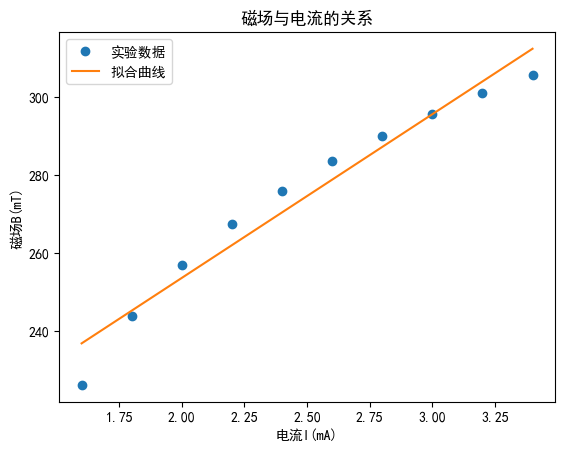

In [87]:
BAdata = pd.read_csv('data.B-A.csv')
B = BAdata['B']
I = BAdata['I']

def funIB(I, k1, b1):
    return k1 * I + b1

popt1, pcov1 = curve_fit(funIB, I, B)
plt.plot(I, B, 'o', label='实验数据')
plt.plot(I, funIB(I, *popt1), label='拟合曲线')
plt.title('磁场与电流的关系')
plt.xlabel('电流I(mA)')
plt.ylabel('磁场B(mT)')
plt.legend()

## 水样品数据

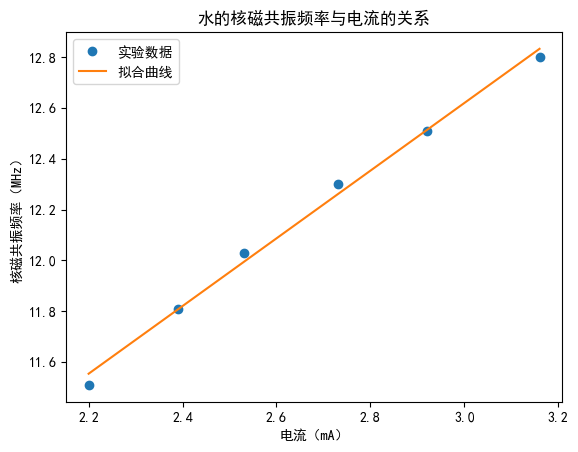

In [88]:
wdata = pd.read_csv('data.H2O.csv')
vw = wdata['v']
Iw = wdata['I']

def funIv(I, k2, b2):
    return k2 * I + b2

def funBv(B, k3, b3):
    return k3 * B + b3

popt2, pcov2 = curve_fit(funIv, Iw, vw)
plt.figure()
plt.plot(Iw, vw, 'o', label='实验数据')
plt.plot(Iw, funIv(Iw, *popt2), label='拟合曲线')
plt.title('水的核磁共振频率与电流的关系')
plt.xlabel('电流（mA）')
plt.ylabel('核磁共振频率（MHz）')
plt.legend()

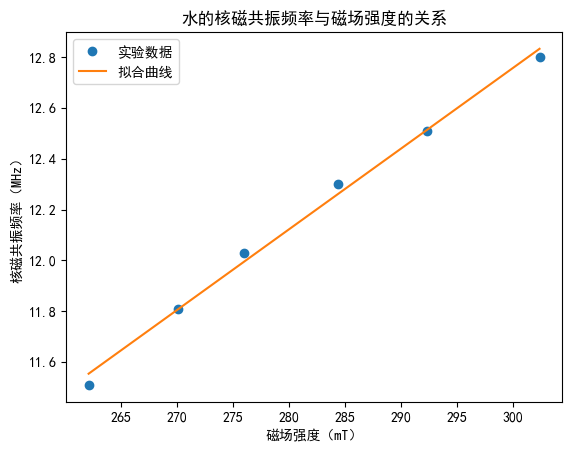

In [89]:
Bw = funIB(Iw, popt1[0], popt1[1])
popt3, pcov3 = curve_fit(funBv, Bw, vw)
plt.figure()
plt.plot(Bw, vw, 'o', label='实验数据')
plt.plot(Bw, funBv(Bw, *popt3), label='拟合曲线')
plt.title('水的核磁共振频率与磁场强度的关系')
plt.xlabel('磁场强度（mT）')
plt.ylabel('核磁共振频率（MHz）')
plt.legend()

### 特定数据计算

In [90]:
gws = (cst.h * vw[0]) / (5.051e-27 * 267.6) * 1e9
delta1 = (gws - 5.5857) / 5.5857 
print('特殊值计算出的g_H: %.5f' %gws)
print('特殊值计算出的g_H的误差: {:.4%}'.format(delta1))

特殊值计算出的g_H: 5.64245
特殊值计算出的g_H的误差: 1.0160%


## 聚四氟乙烯样品数据

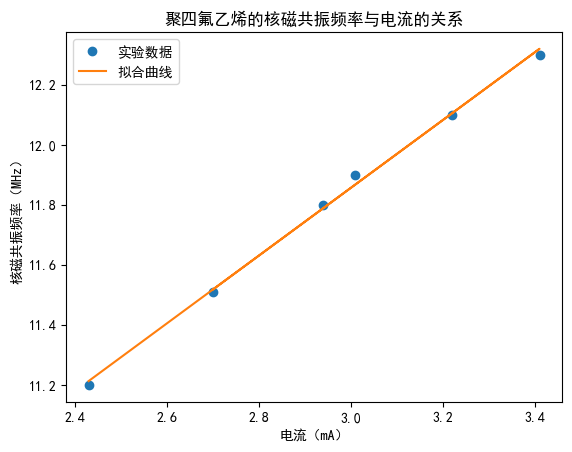

In [91]:
fdata = pd.read_csv('data.C2F4.csv')
vf = fdata['v']
If = fdata['I']

popt4, pcov4 = curve_fit(funIv, If, vf)
plt.figure()
plt.plot(If, vf, 'o', label='实验数据')
plt.plot(If, funIv(If, *popt4), label='拟合曲线')
plt.title('聚四氟乙烯的核磁共振频率与电流的关系')
plt.xlabel('电流（mA）')
plt.ylabel('核磁共振频率（MHz）')
plt.legend()

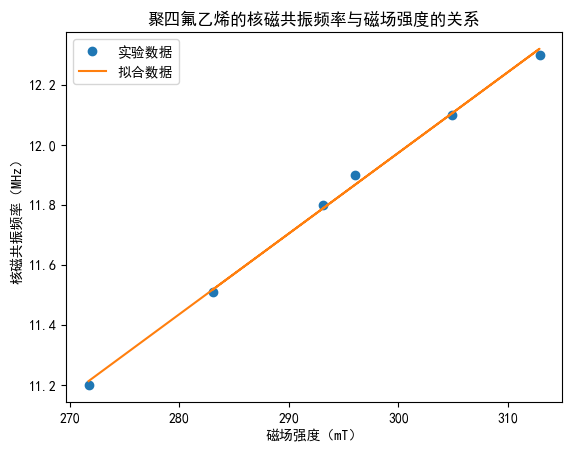

In [92]:
Bf = If * popt1[0] + popt1[1]
popt5, pcov5 = curve_fit(funBv, Bf, vf)
plt.figure()
plt.plot(Bf, vf, 'o', label='实验数据')
plt.plot(Bf, funBv(Bf, *popt5), label='拟合数据')
plt.title('聚四氟乙烯的核磁共振频率与磁场强度的关系')
plt.xlabel('磁场强度（mT）')
plt.ylabel('核磁共振频率（MHz）')
plt.legend()

### 特定数据计算

In [93]:
gfs = (cst.h * vf[2]) / (5.051e-27 * 295.6) * 1e9
delta2 = (gfs - 5.2567) / 5.2567 
print('特殊值计算出的g_H: %.5f' %gfs)
print('特殊值计算出的g_H的误差: {:.4%}'.format(delta2))

特殊值计算出的g_H: 5.28106
特殊值计算出的g_H的误差: 0.4634%
